In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def convert_to_float(value):
    """
    Преобразование значений в столбцах датафрейма;
    :param value: float
    :return: float
    """
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value

#######################################################################################################################

In [4]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../data/textiles.csv', sep=';')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)
textiles['warp_mean'] = textiles.warp_mean.apply(convert_to_float)
textiles['weft_mean'] = textiles.weft_mean.apply(convert_to_float)
textiles['warp_dens'] = textiles.warp_dens.apply(convert_to_float)
textiles['weft_dens'] = textiles.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

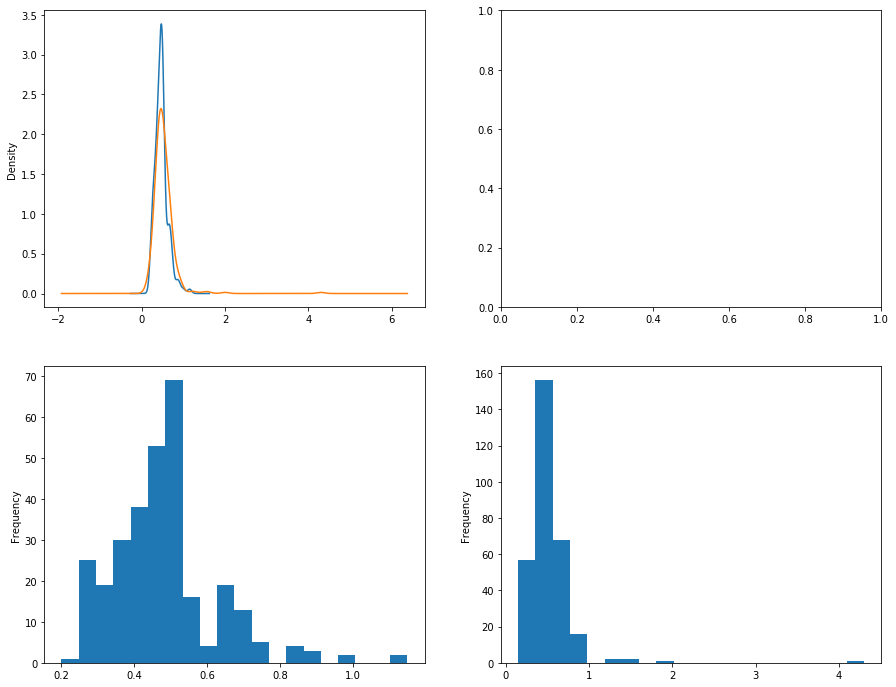

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

textiles.warp_nominal.plot.kde(ax=ax[0][0])
textiles.weft_nominal.plot.kde(ax=ax[0][0])

# textiles.warp_nominal.plot.hist(ax=ax[0][0])
# textiles.weft_nominal.plot.hist(ax=ax[0][1])

textiles.warp_nominal.plot.hist(ax=ax[1][0], bins=20)
textiles.weft_nominal.plot.hist(ax=ax[1][1], bins=20)

plt.show()